**QUESTION 01**

(a) Convert file data to list

In [ ]:
s=open('shashank.txt','r')
lines=s.readlines()
print(lines)

['hello this is shashank asthana.\n', 'This is my demo file for the program.\n', 'I hope it runs on the pc.\n', 'otherwise i will be disappointed.']


(b) Convert User Input to a Number

In [ ]:
s=int(input())
print(s)
print(type(s))

10
10
<class 'int'>


(c) Convert String to Datetime in Python

In [ ]:
date="2022-01-10 16:48:20"
date_tuple=tuple([int(x) for x in date[:10].split('-')])+tuple([int(x) for x in date[11:].split(':')])
print(date_tuple)

(2022, 1, 10, 16, 48, 20)


(d) How to call external commands in Python?

In [ ]:
import os
os.system("dir *.txt")

0

(e)  How to count the occurrences of a list item?

In [ ]:
l=[1,2,3,4,5,6,7]
#a stands for the item which you want to count the occurance
a=int(input())
print(l.count(a))


2
0


(f) How to flatten lists in Python?

In [ ]:
import numpy as np
lis=np.array([[1,2,3],[4,5,6]])
a=lis.ravel()
print(a)

[1 2 3 4 5 6]


(g) How to merge dictionaries in Python?


In [ ]:
dict1={'svs':'ai' , 'shashank':'cse','soham':'mt'}
dict2={'hello':'bye','hi':'hey'}
dict1.update(dict2)
print(dict1)

{'svs': 'ai', 'shashank': 'cse', 'soham': 'mt', 'hello': 'bye', 'hi': 'hey'}


(h) Remove duplicate items from a list in Python?

In [ ]:
lis=[1,2,3,1,3,2,4,5]
a=[]
for i in range(len(lis)):
  if(lis[i] not in a):
    a.append(lis[i])
  else:
    pass

print(a)

[1, 2, 3, 4, 5]


(i) Write a Python script to check whether a given key already exists in a dictionary.

In [ ]:
dict1={'svs':'ai' , 'shashank':'cse','soham':'mt'}
lis=dict1.keys()
x=input()
if x in lis:
  print("key exists")
else:
  print("key not found")






shashank
key exists


**QUESTION 02**

Using numpy create two matrices of same size of your choice, fill the non-zero values into these two matrices. Now perform following:

(a) Display first row of first matrix
(b) Display second column of second matrix
(c) Perform matrix multiplication
(d) Perform element-wise multiplication
(e) Perform dot product between each column of first matrix and each column of second matrix


In [ ]:
import numpy as np
lis1=np.array([[1,2,3],[4,5,6],[7,8,9]])
lis2=np.array([[10,11,12],[13,14,15],[16,17,18]])
print(lis1[0])
print(lis2[ :,1])
print(np.dot(lis1,lis2))
print(np.multiply(lis1,lis2))
print(np.dot(lis1[:,1],lis2[:,1]))

[1 2 3]
[11 14 17]
[[ 84  90  96]
 [201 216 231]
 [318 342 366]]
[[ 10  22  36]
 [ 52  70  90]
 [112 136 162]]
228


**QUESTION 03**

A csv file has been provided to you at this link. The given dataset is related to cars and contains 26 columns.In the given dataset, “Price” is the target variable (i.e., the output).

The marks distribution according to the tasks are as follows:
i) Assign a type to each of the following features (a) Model, (b)Type, (c) Max. Price and (d)Airbags from the following: ordinal/nominal/ratio/interval scale.

ii) Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).

iii) Write a function to reduce noise (any error in the feature) in individual attributes

iv) Write a function to encode all the categorical features in the dataset according to the type of variable jointly.

v) Write a function to normalize / scale the features either individually or jointly.

vi) Write a function to create a random split of the data into train, validation and test sets in the ratio of [70:20:10].

In [ ]:
import pandas as pd
import numpy as np

# (i) (a) Model :- nominal
#     (b) Type:- ordinal
#     (c) Max.Price:- ratio
#     (d) Airbags:- ordinal

# (ii)

df=pd.read_csv("Cars93.csv")
df1=df.fillna(0)
print(df1.isnull().sum())

# (iii)

#here we will drop the row in cylinders in which rotary is mentioned

def reduce_noise(data , column):
    for i in range(data.shape[0]):
      try:
        data[column][i] = int(data[column][i])
      except:
        data = data.drop(i)
        i=i-1
    return data

col = "Cylinders"
df1 = reduce_noise(df1,col)
df1 = df1.reset_index(drop=True)
print(df1[col].to_string())

#(iv)

# we should note here that encoders require their input to be uniformly string or numbers

def encoder(feature,data):
  from sklearn.preprocessing import LabelEncoder
  lab_enc= LabelEncoder()
  for i in feature:
    data[i]=lab_enc.fit_transform(data[i])
  return data

cat_features = ['Manufacturer' , 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Passengers', 'Origin']
df1 = encoder(cat_features,df1)
print(df1[cat_features])

#(v)

# here we are required to perform standardization/normalization
# the formula we can use is (x-mean)/std deviation


def normalize_feature(list_columns):
  for i in list_columns:
    df1[i]=((df1[i]-df1[i].mean())/df1[i].std())
  return df1


list_features = ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']
df1 = normalize_feature(list_features)
print(df1[list_features])

# (vi)

# here we need to split the data in the ratio of [70:20:10]

from sklearn.model_selection import train_test_split

# creating X and Y numpy arrays to pass into tts
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)
x_test, x_vali, y_test, y_vali = train_test_split(x_test,y_test,test_size = 0.67)

print("Dataframe length : ", len(df1))
print("Training set length : ", len(x_train))
print("Validation set length : ", len(x_vali))
print("Test set length", len(x_test))


Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
dtype: int64
0     4
1     6
2     6
3     6
4     4
5     4
6     6
7     6
8     6
9     8
10    8
11    4
12    4
13    6
14    4
15    6
16    6
17    8
18    8
19    6
20    4
21    6
22    4
23    4
24    4
25    6
26    4
27    6
28    4
29    6
30    4
31    4
32    4
33    4
34    4
35    6
36    6
37    8
38    3
39    4
40    4
41    4
42    4
43    4
44    4
45 

<ipython-input-6-bb71e72fa83e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = int(data[column][i])


**QUESTION 04**

Plot following functions:

(a) y = 5x + 4 where x ranges from [-10, 10].



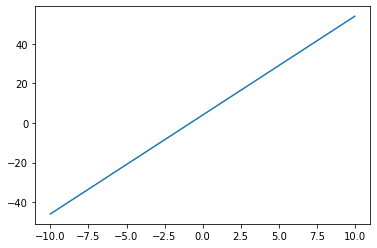

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-10,10,60)
y=5*x + 4

plt.plot(x,y)
plt.show()





(b) y = ln(x) where x > 10 and x < 100.

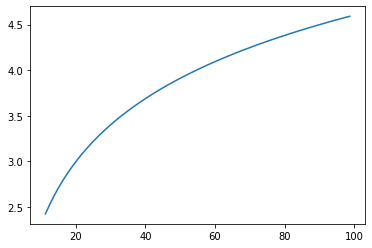

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x=np.linspace(10,100,70)
x=np.delete(x,0)
x=np.delete(x,68)


y=np.log(x)

plt.plot(x,y)
plt.show()

(c) y = x^2 where x ranges from [-10, 10].

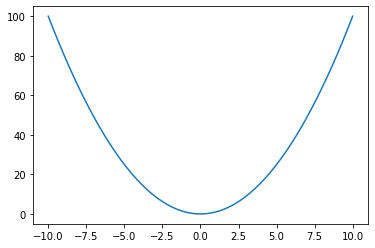

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x=np.linspace(-10,10,60)
y=x**2

plt.plot(x,y)
plt.show()

**QUESTION 05**

(Evaluation Matrix): download colab file and dataset from given link. (15 Marks) Some task we already performed on given data in same colab file, Now your task is to perform following operation from inbuilt and scratch:
1. Average Accuracy and Class-Wise Accuracy
2. Precision
3. Recall
4. F1-Score
5. Sensitivity
6. Specificity


In [ ]:
from scipy.special import boxcox1p
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score as acc

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


data = pd.read_csv("data.csv")

change_M = data.diagnosis == "M"
change_B = data.diagnosis == "B"

data.loc[change_M,"diagnosis"]=0
data.loc[change_B,"diagnosis"]=1


Y = data.diagnosis.to_numpy().astype('int')

X_data = data.drop(columns=["id","diagnosis","Unnamed: 32"])
X = X_data.to_numpy()


#dividing the data intro training and test data



x_train,x_test,y_train,y_test = tts(X,Y,test_size=0.3,shuffle=False)


#now we are fitting the data in the model and predicting for the test data

logistic_model = LR()
logistic_model.fit(x_train,y_train)
logistic_pred = logistic_model.predict(x_test)

decision_model = DTC()
decision_model.fit(x_train,y_train)
decision_pred = decision_model.predict(x_test)



#1. Now we will calculate the average accuracy using the inbuilt library

inbuilt_acc_logistic = acc(y_test,logistic_pred)
inbuilt_acc_decision = acc(y_test,decision_pred)

print("Accuracy for Logistic Regression-based Predictions =>",str(inbuilt_acc_logistic*100)+"%")
print("Accuracy for Decision Tree-based Predictions =>",str(inbuilt_acc_decision*100)+"%")

#Now we calculate the average accuracy using scratch

def accuracy_rate(testing,predicted):
  count=0
  for i in range(len(testing)):
    if testing[i] == predicted[i]:
      count += 1
  return count / float(len(testing)) * 100.0

print("Accuracy for Logistic Regression-based Predictions =>", str(accuracy_rate(y_test,logistic_pred)) + "%")
print("Accuracy for Decision Tree-based Predictions =>", str(accuracy_rate(y_test,decision_pred)) + "%")
print()

#2. Now we will calculate the precision using inbuilt library

inbuilt_ps_logistic = ps(y_test,logistic_pred)
inbuilt_ps_decision = ps(y_test,decision_pred)

print("Precision for Logistic Regression-based Predictions =>",str(inbuilt_ps_logistic*100)+"%")
print("Precision for Decision Tree-based Predictions =>",str(inbuilt_ps_decision*100)+"%")


# Now we will calculate precision using scratch
def precision(test,pred):
  tp_count=0
  fp_count=0
  for i in range(len(test)):
    if test[i]==1 and pred[i]==1:
      tp_count+=1
    elif (test[i]==0 and pred[i]==1):
      fp_count+=1

  return (tp_count/(tp_count+fp_count))*100

print("Precision for Logistic Regression-based Predictions =>",str(precision(y_test,logistic_pred))+"%")
print("Precision for Decision Tree-based Predictions =>",str(precision(y_test,decision_pred))+"%")

print()

#3. Now we will calculate the recall using inbuilt library

inbuilt_rs_logistic = rs(y_test,logistic_pred)
inbuilt_rs_decision = rs(y_test,decision_pred)

print("Recall for Logistic Regression-based Predictions =>",str(inbuilt_rs_logistic*100)+"%")
print("Recall for Decision Tree-based Predictions =>",str(inbuilt_rs_decision*100)+"%")

#Now we will calculate recall from scratch

def recall(test,pred):
  tp_count=0
  fn_count=0
  for i in range(len(test)):
    if test[i]==1 and pred[i]==1:
      tp_count+=1
    elif test[i]==1 and pred[i]==0:
      fn_count+=1
  return (tp_count/(tp_count + fn_count))*100

print("Recall for Logistic Regression-based Predictions =>",str(recall(y_test,logistic_pred))+"%")
print("Recall for Decision Tree-based Predictions =>",str(recall(y_test,decision_pred))+"%")

print()

# 4. Now we will calculate F1 score using inbuilt library

inbuilt_f1s_logistic = f1s(y_test,logistic_pred)
inbuilt_f1s_decision = f1s(y_test,decision_pred)

print("F1-Score for Logistic Regression-based Predictions =>",str(inbuilt_f1s_logistic*100)+"%")
print("F1-Score for Decision Tree-based Predictions =>",str(inbuilt_f1s_decision*100)+"%")

# Now we will calculate F1 Score from scratch

a1=precision(y_test,logistic_pred)
b1=precision(y_test,decision_pred)

a2=recall(y_test,logistic_pred)
b2=recall(y_test,decision_pred)

print("F1 Score for logistic regression model is =>", str(2/((1/a1)+(1/a2))) + "%")
print("F1 Score for decision tree based prediction model is =>", str(2/((1/b1)+(1/b2))) + "%")

print()

# 5. Now we will calculate Senstivity from scratch

def senstivity(test,pred):
  tp_count=0
  fn_count=0
  for i in range(len(test)):
    if test[i]==1 and pred[i]==1:
      tp_count+=1
    elif test[i]==1 and pred[i]==0:
      fn_count+=1
  return (tp_count/(tp_count + fn_count))*100


print("The senstivity value for logistic regression is =>" , str(senstivity(y_test,logistic_pred)) + "%")
print("The senstivity value for decision tree based prediction model is =>" , str(senstivity(y_test,decision_pred)) + "%")

print()

# 6. Now we will calculate Specificity from scratch

def specificity(test,pred):
  tn_count=0
  fp_count=0
  for i in range(len(test)):
    if(test[i]==0 and pred[i]==0):
      tn_count+=1
    elif(test[i]==0 and pred[i]==1):
      fp_count+=1
  return (tn_count/(tn_count + fp_count))*100


print("The specificity value for logistic regression is =>" , str(specificity(y_test,logistic_pred)) + "%")
print("The specificity value for decision tree based prediction model is =>" , str(specificity(y_test,decision_pred)) + "%")




Accuracy for Logistic Regression-based Predictions => 92.98245614035088%
Accuracy for Decision Tree-based Predictions => 87.71929824561403%
Accuracy for Logistic Regression-based Predictions => 92.98245614035088%
Accuracy for Decision Tree-based Predictions => 87.71929824561403%

Precision for Logistic Regression-based Predictions => 99.18032786885246%
Precision for Decision Tree-based Predictions => 100.0%
Precision for Logistic Regression-based Predictions => 99.18032786885246%
Precision for Decision Tree-based Predictions => 100.0%

Recall for Logistic Regression-based Predictions => 91.66666666666666%
Recall for Decision Tree-based Predictions => 84.0909090909091%
Recall for Logistic Regression-based Predictions => 91.66666666666666%
Recall for Decision Tree-based Predictions => 84.0909090909091%

F1-Score for Logistic Regression-based Predictions => 95.2755905511811%
F1-Score for Decision Tree-based Predictions => 91.35802469135803%
F1 Score for logistic regression model is => 95.